## Importing library and reading csv file of titanic dataset 

In [152]:
import pandas as pd
df = pd.read_csv("titanic_data_set.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Analysing data

In [153]:
df.shape

(891, 12)

In [154]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [155]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Flynn, Mr. John",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [156]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [157]:
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]
print("Survived : \n", survived.head(), "\nNot Survived : \n", not_survived.head())

Survived : 
    PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN 

In [158]:
print("people survived = {0}, i.e., {1}%".format(len(survived), len(survived)/len(df)*100))
print("people not survived = {0}, i.e., {1}%".format(len(not_survived), len(not_survived)/len(df)*100))
print("total people = ", len(df))

people survived = 342, i.e., 38.38383838383838%
people not survived = 549, i.e., 61.61616161616161%
total people =  891


## Analyzing features with survival of Pclass and Sex

In [159]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [160]:
df.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [161]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [162]:
df.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

## Visual Representation

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

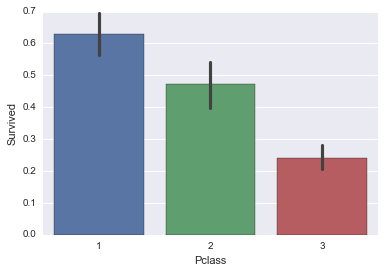

In [164]:
sns.barplot(x='Pclass', y='Survived', data=df)

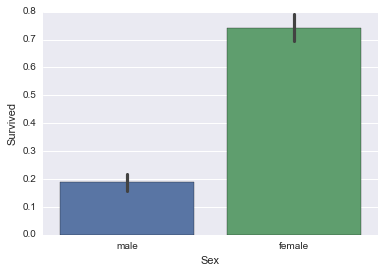

In [165]:
sns.barplot(x='Sex', y='Survived', data=df)

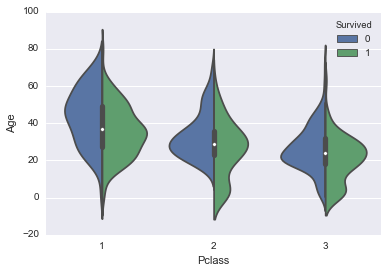

In [166]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)

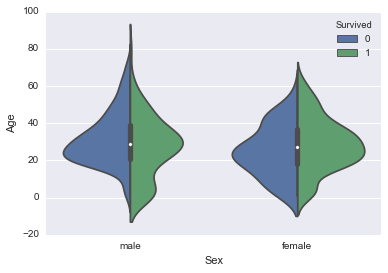

In [167]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True)

# Analysis of missing data

In [168]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [169]:
from sklearn.preprocessing import Imputer
age_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
age_imputer = age_imputer.fit(df.iloc[:, [5]])
df.iloc[:, [5]] = age_imputer.transform(df.iloc[:, [5]])

In [170]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [171]:
df['Embarked'] = df['Embarked'].fillna('S')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Label Encode and One Hot Encode features

In [172]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
df.iloc[:, [4]] = le_sex.fit_transform(df.iloc[:, [4]])
df.head()

c:\python36\lib\site-packages\sklearn\preprocessing\label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [173]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le_embarked = LabelEncoder()
df.iloc[:, [11]] = le_embarked.fit_transform(df.iloc[:, [11]])
df.head()

c:\python36\lib\site-packages\sklearn\preprocessing\label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [174]:
df = pd.get_dummies(df, columns=['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1


In [175]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_0,Embarked_1,Embarked_2,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,1


## Drop irrelevant features

In [176]:
irrelevant_features = ['PassengerId', 'SibSp', 'Parch', 'Ticket', 'Name', 'Cabin']
df = df.drop(irrelevant_features, axis=1)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked_0,Embarked_1,Embarked_2,FamilySize
0,0,3,1,22.0,7.2500,0,0,1,2
1,1,1,0,38.0,71.2833,1,0,0,2
2,1,3,0,26.0,7.9250,0,0,1,1
3,1,1,0,35.0,53.1000,0,0,1,2
4,0,3,1,35.0,8.0500,0,0,1,1


## Export prepared csv dataset

In [177]:
df.to_csv('titanic_prepared_data.csv', index=0)